In [1]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
        ["ytbeaver",
     "beaver.","no change",40.804483,-77.864219],
            ["ytcollege",
     "college","no change",40.804483,-77.864219],
    ]

camera_subset = [

    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camera_subsetx = [
    

  
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
    
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817]
]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [2]:
date = "032822"

In [3]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv(f"allcams{date}.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



,datetime_UTC,image_file,vehicle_count,datetime_EST,camera_name
0,2020-04-27 00:00:02,/home/ubuntu/cams1/20200427_000002_CAM02033CCT...,0,2020-04-26 20:00:02,CAM02033CCTV38
1,2020-04-27 00:00:05,/home/ubuntu/cams1/20200427_000005_collegeTwp.jpg,2,2020-04-26 20:00:05,collegeTwp
2,2020-04-27 00:00:08,/home/ubuntu/cams1/20200427_000008_CAM02028CCT...,1,2020-04-26 20:00:08,CAM02028CCTV32
3,2020-04-27 00:00:10,/home/ubuntu/cams1/20200427_000010_CAM02037CCT...,3,2020-04-26 20:00:10,CAM02037CCTV43
4,2020-04-27 00:00:12,/home/ubuntu/cams1/20200427_000012_CAM02038CCT...,0,2020-04-26 20:00:12,CAM02038CCTV44
...,...,...,...,...,...
27784728,2022-03-28 13:04:34,/home/ubuntu/camse35/CAM02001CCTV2/20220328/20...,0,2022-03-28 09:04:34,CAM02001CCTV2
27784729,2022-03-28 13:04:36,/home/ubuntu/camse35/CAM02010CCTV11/20220328/2...,0,2022-03-28 09:04:36,CAM02010CCTV11
27784730,2022-03-28 13:04:38,/home/ubuntu/camse35/CAM02005CCTV9/20220328/20...,1,2022-03-28 09:04:38,CAM02005CCTV9
27784731,2022-03-28 13:04:45,/home/ubuntu/camse35/CAM02028CCTV32/20220328/2...,2,2022-03-28 09:04:45,CAM02028CCTV32


In [4]:
print(len(xdf))

27784733


In [5]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [6]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [7]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [8]:
icdfcvc.to_csv(f"vehicle_avg_per_hour_each_camera_427-{date}.csv",index=False)

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


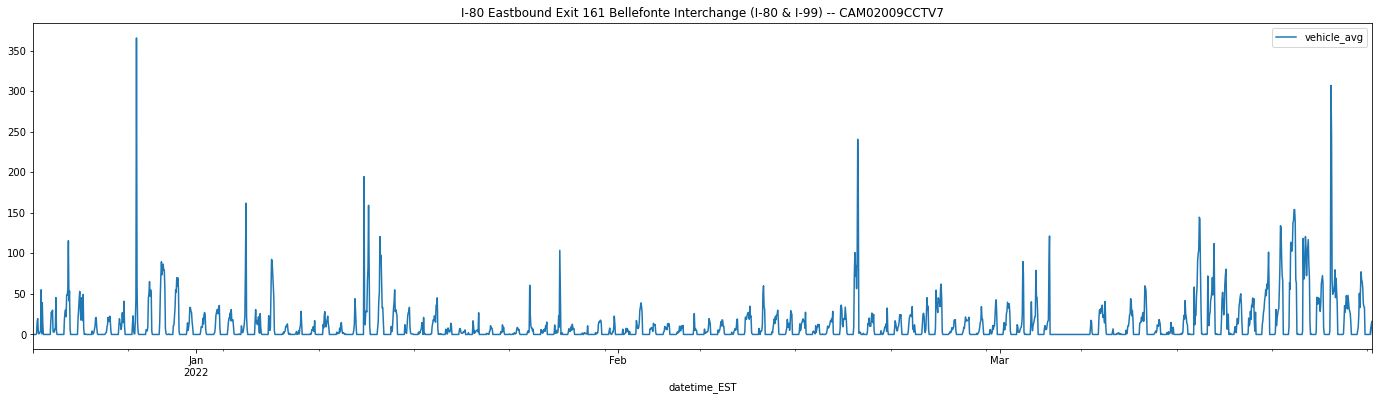

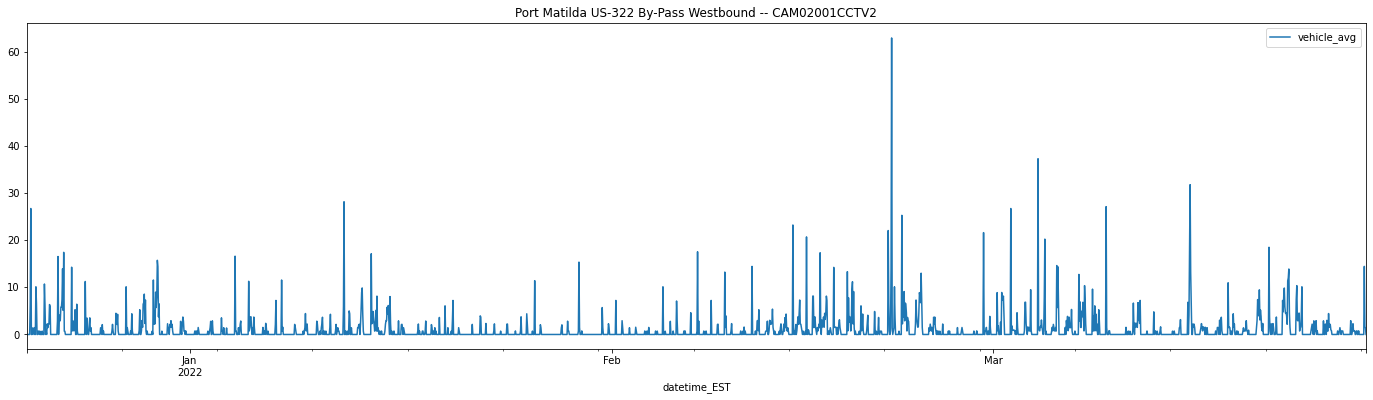

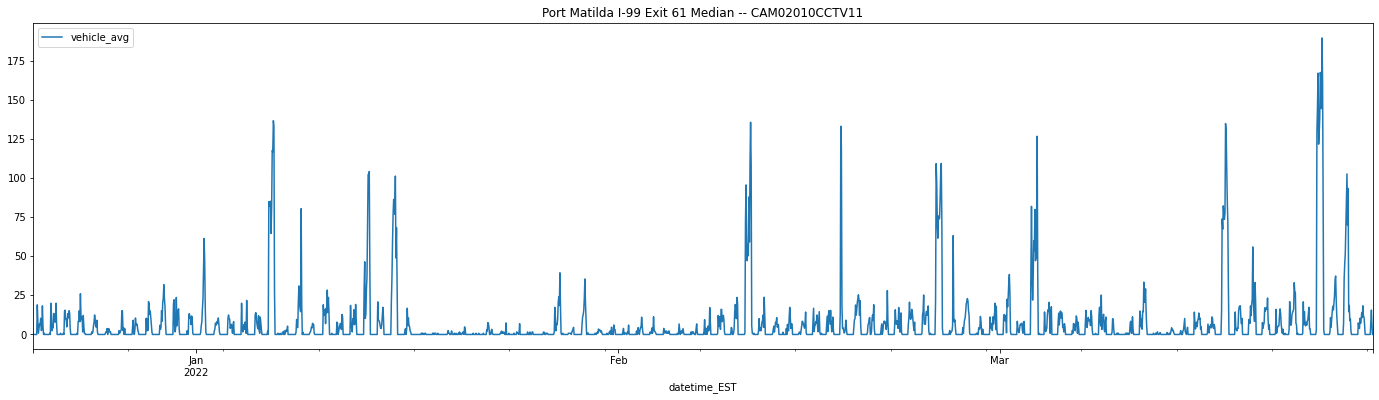

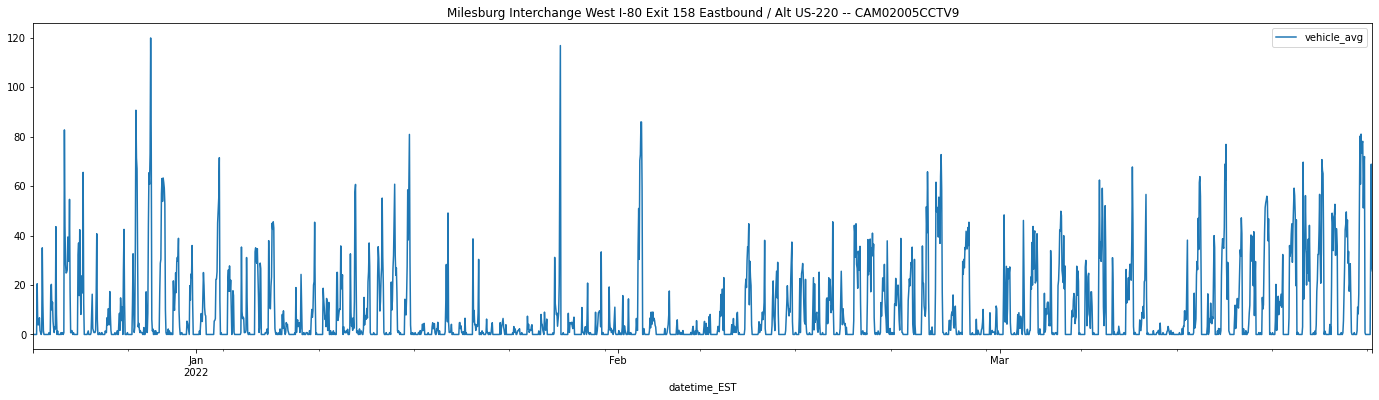

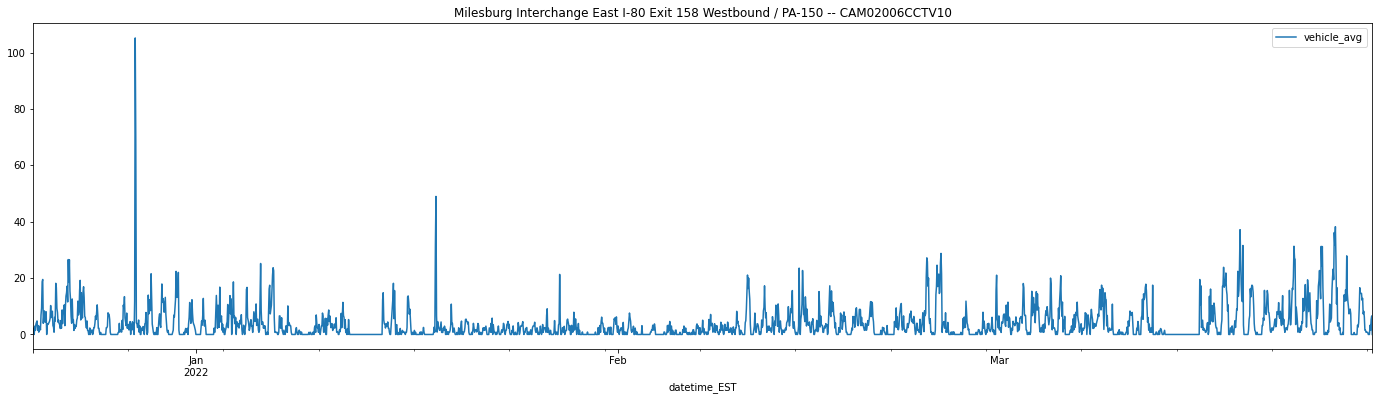

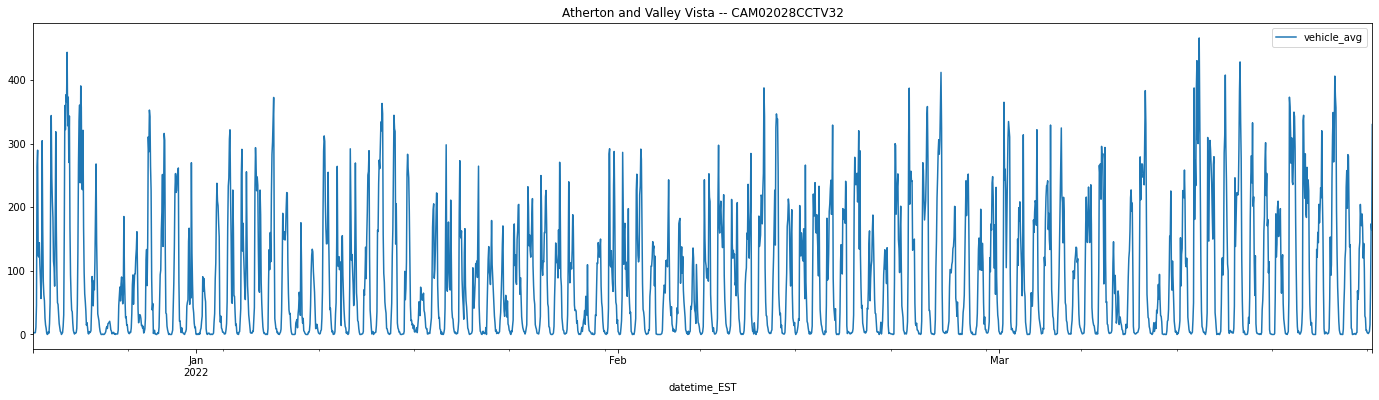

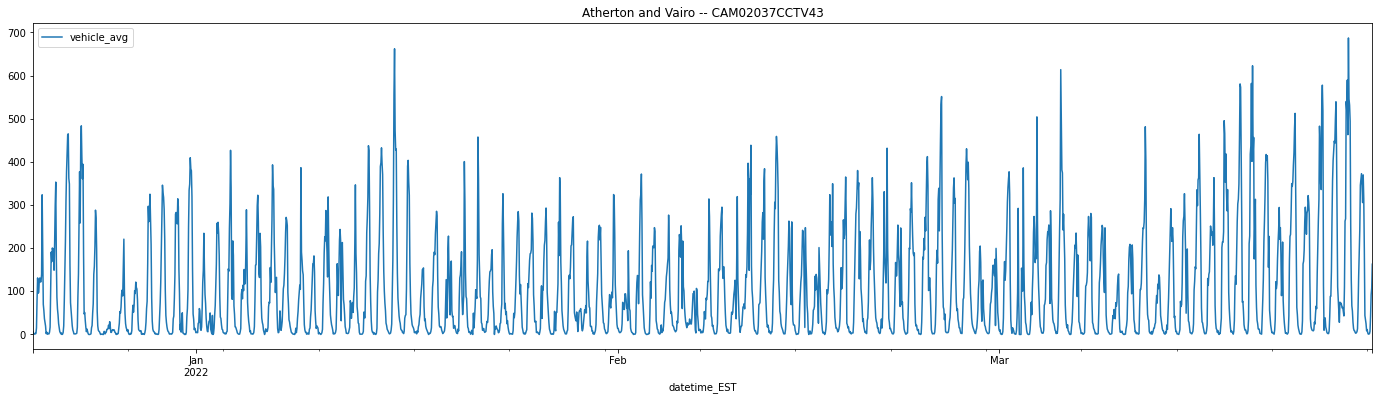

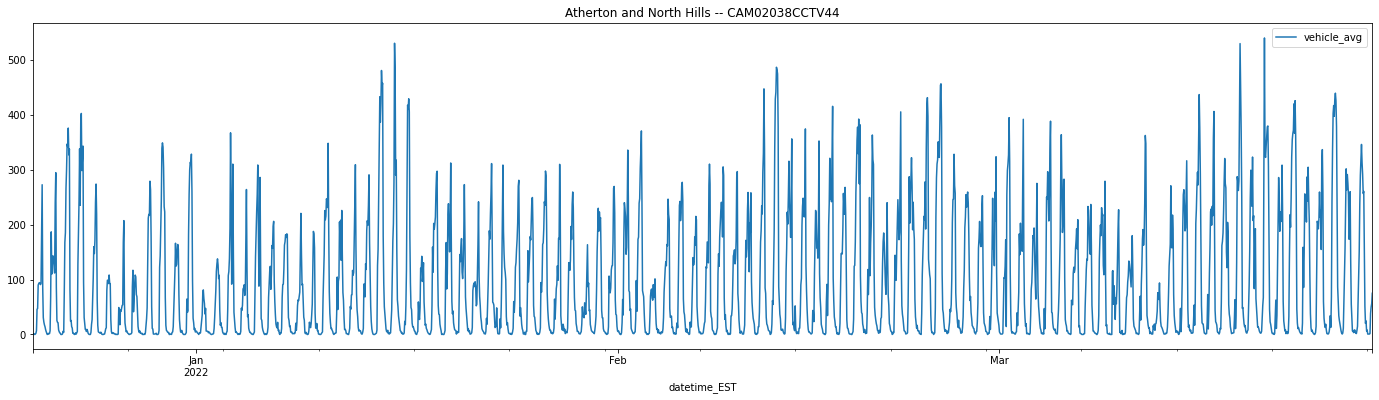

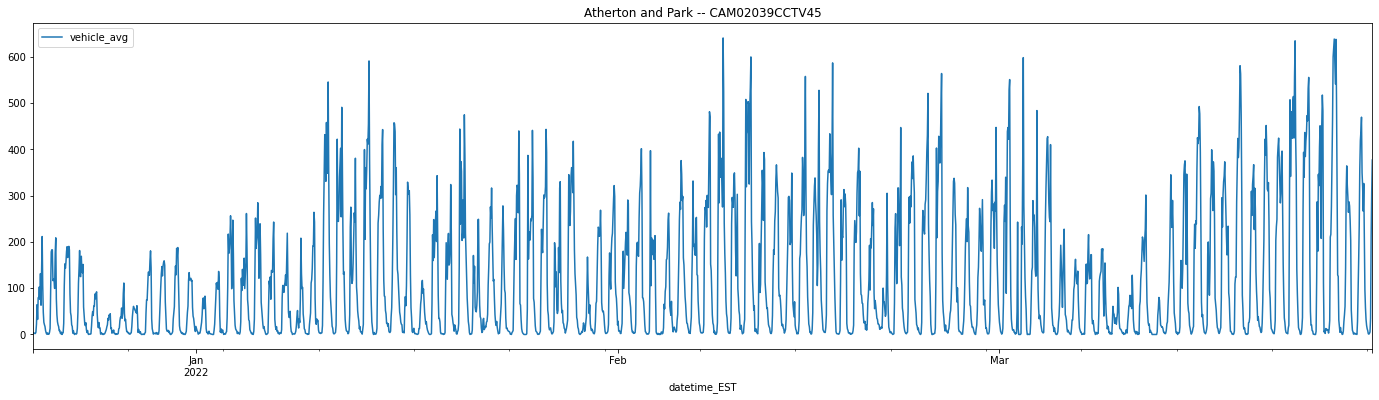

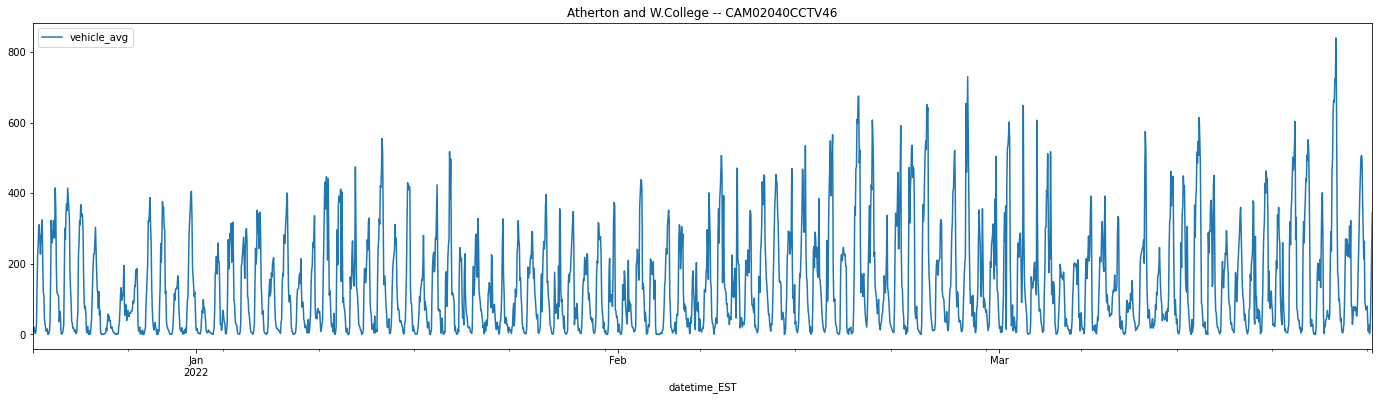

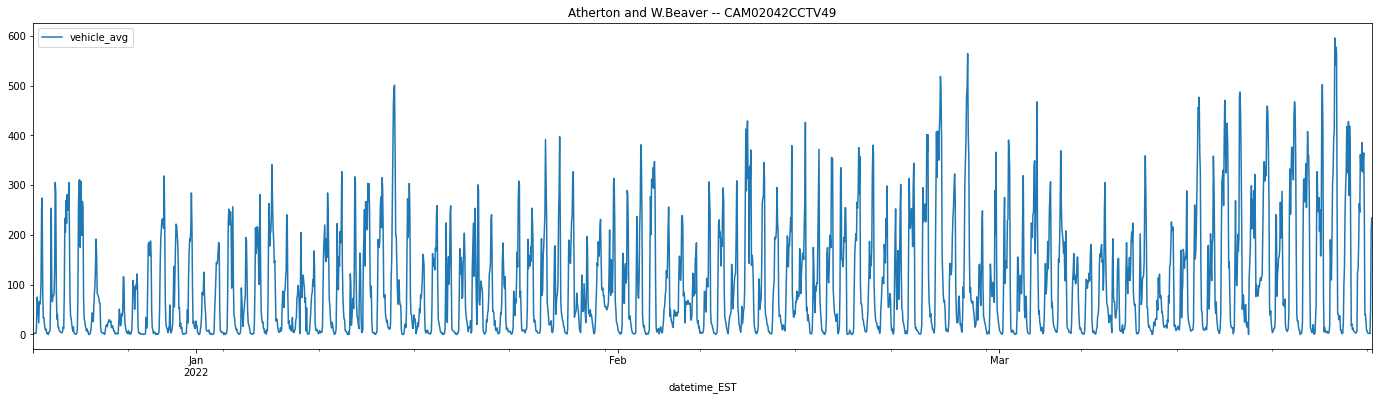

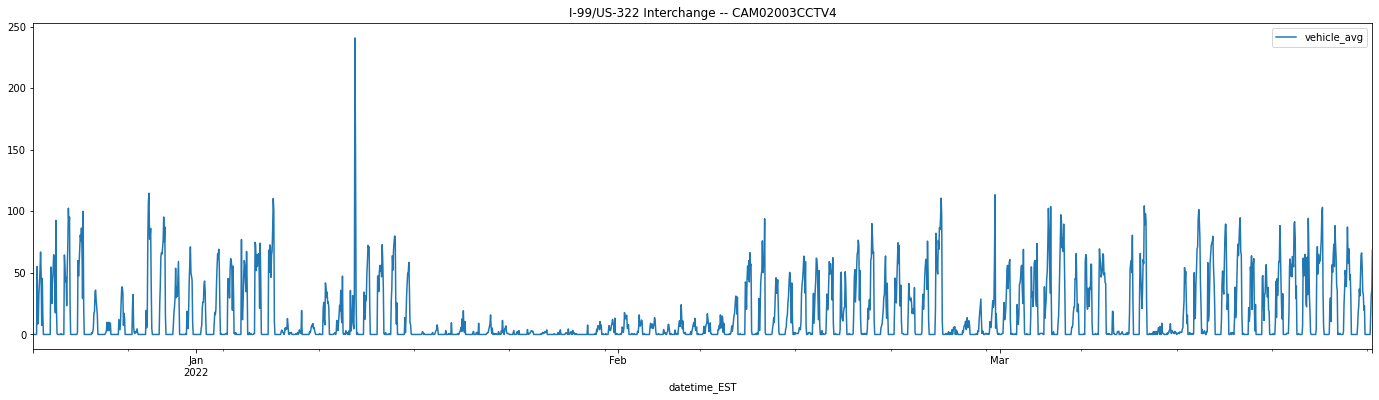

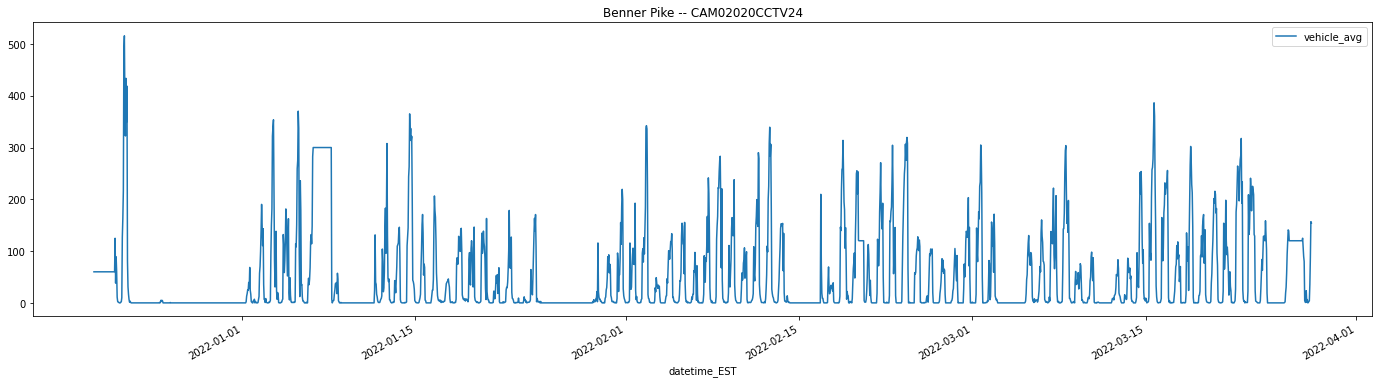

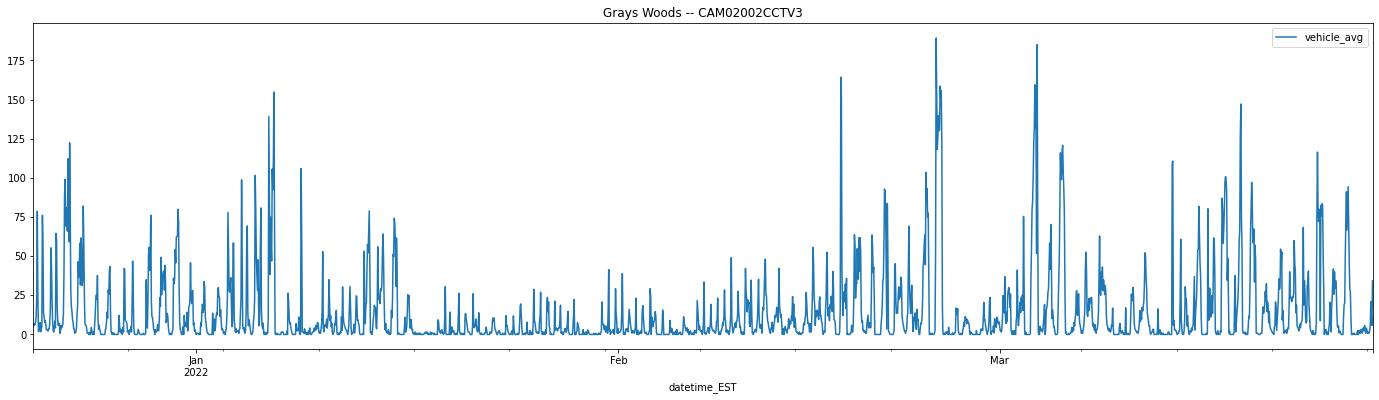

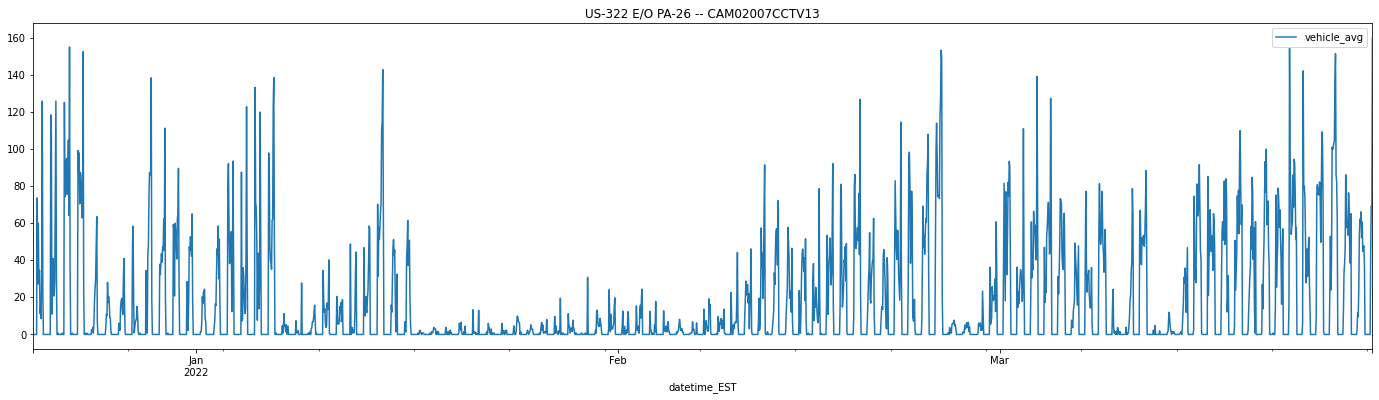

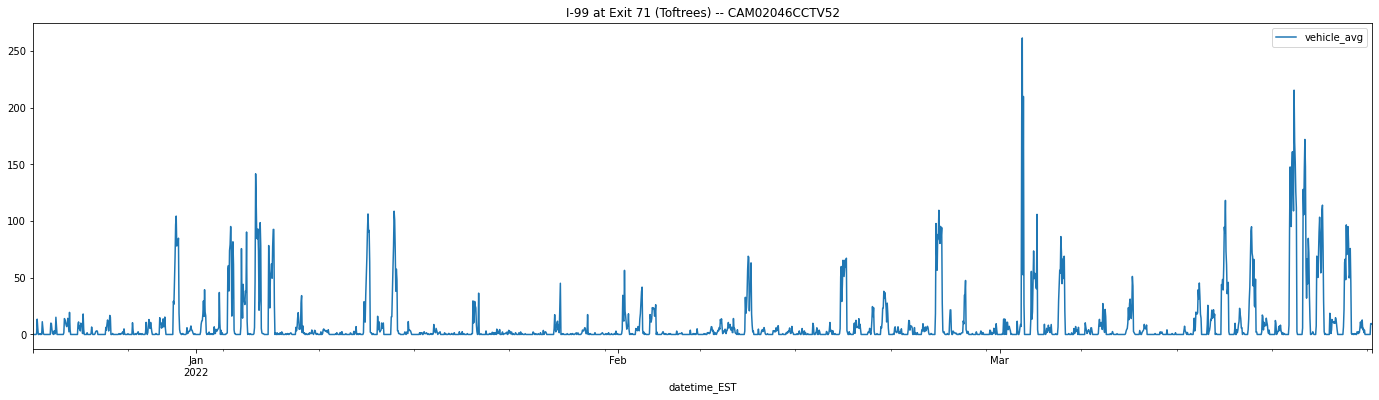

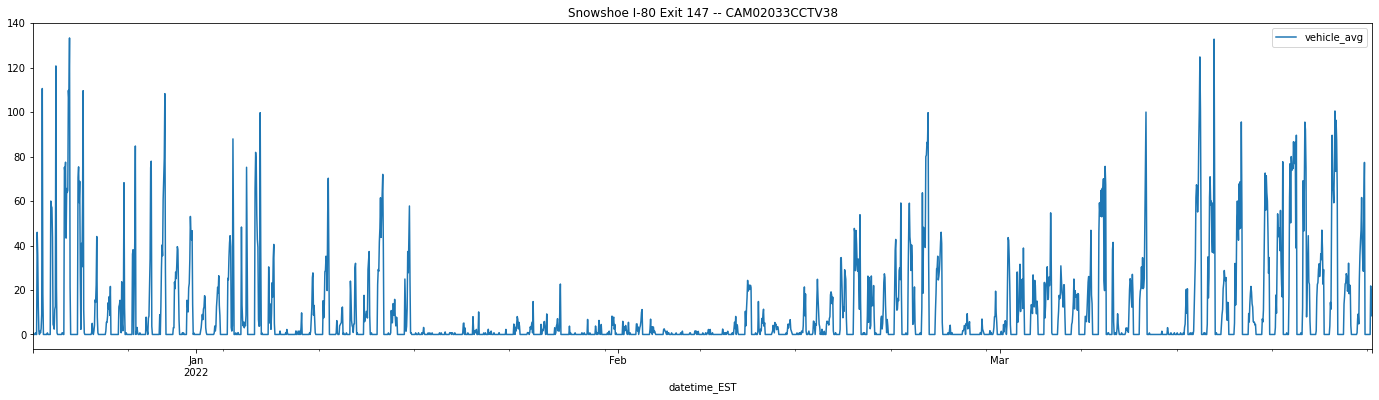

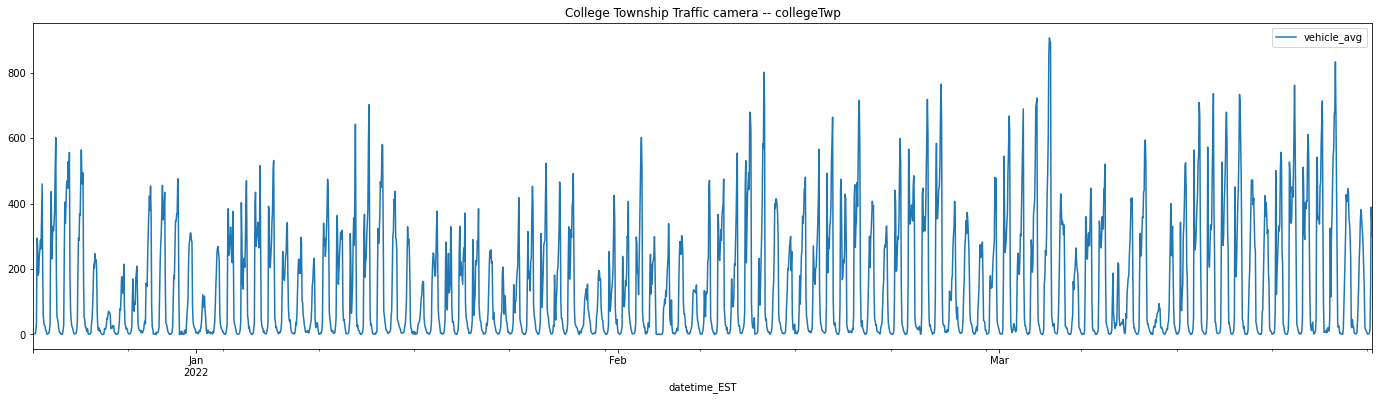

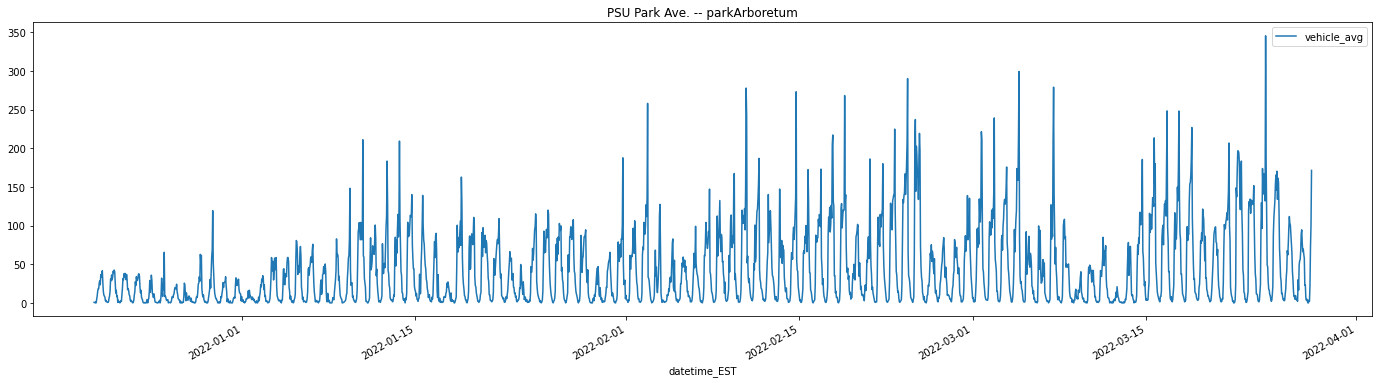

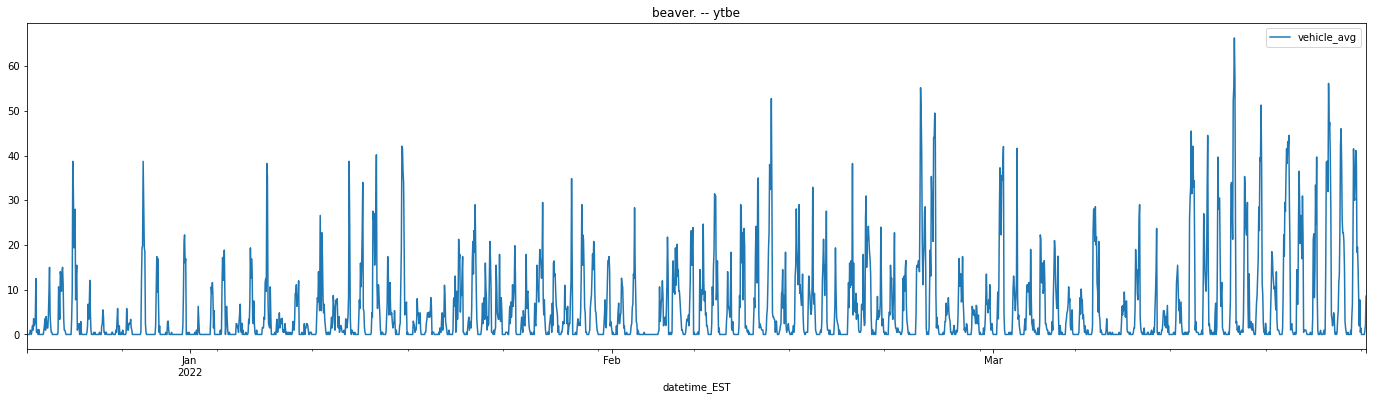

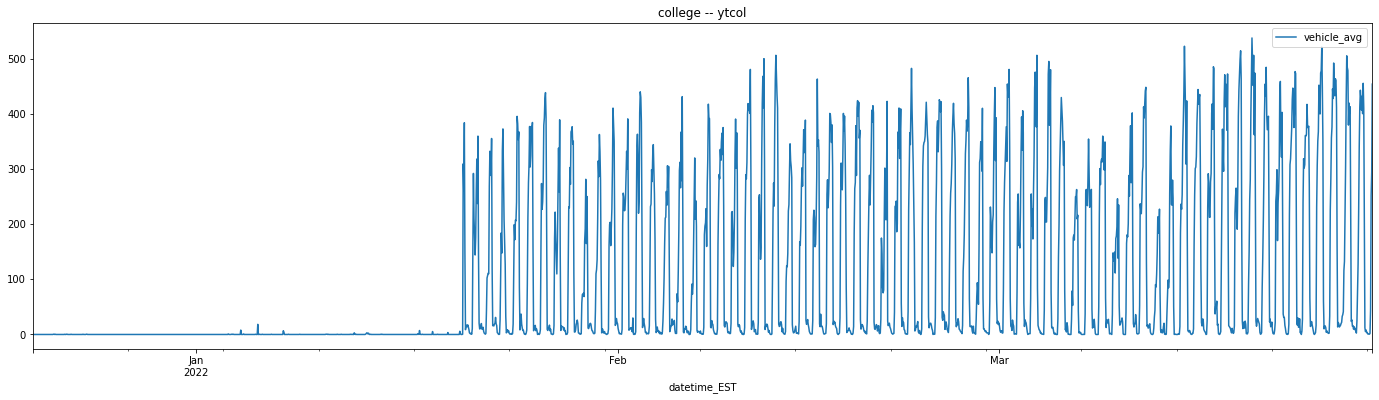

In [9]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    sds = fdf_twp[(fdf_twp['datetime_EST'] > '2021-12-20 00:00:00')]
    ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [10]:

camera_subset_c = [

    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],

    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
       ["ytbeaver",
     "beaver.","no change",40.804483,-77.864219],
            ["ytcollege",
     "college","no change",40.804483,-77.864219],
    ]


camera_subset_r = [
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
     ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
]





In [10]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

print("X")

#xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn1.drop(xdfn1[(xdfn1["camera_name"] == "CAM02009CCTV7") & (xdfn1['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn1['datetime_EST'] < '2020-8-19 16:03:00') ].index)

del xdfn
del xdfn1

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

del xdfn3

print("X")


xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)

del xdfn4
print("X")

xdfn6 = xdfn5.drop(xdfn5[(xdfn5["camera_name"] == "CAM02005CCTV9") & (xdfn5['datetime_EST'] > '2020-11-25 15:00:00') & (xdfn5['datetime_EST'] < '2020-11-27 00:00:00')].index)
del xdfn5
xdfn7 = xdfn6.drop(xdfn6[(xdfn6["camera_name"] == "CAM02020CCTV24") & (xdfn6['datetime_EST'] > '2020-12-07 11:00:00') &  (xdfn6['datetime_EST'] < '2020-12-08 17:00:00')].index)
del xdfn6
print("X")

xdfn7b = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02006CCTV10") & (xdfn7['datetime_EST'] > '2021-02-26 16:00:00') &  (xdfn7['datetime_EST'] < '2021-02-27 07:00:00')].index)
del xdfn7
xdfn7c = xdfn7b.drop(xdfn7b[(xdfn7b["camera_name"] == "CAM02020CCTV24") & (xdfn7b['datetime_EST'] > '2021-03-25 09:00:00') &  (xdfn7b['datetime_EST'] < '2021-03-27 06:00:00')].index)
del xdfn7b
print("X")

xdfn7d = xdfn7c.drop(xdfn7c[(xdfn7c["camera_name"] == "CAM02020CCTV24") & (xdfn7c['datetime_EST'] > '2021-11-20 15:00:00') &  (xdfn7c['datetime_EST'] < '2021-11-21 17:00:00')].index)
del xdfn7c
xdfn7e = xdfn7d.drop(xdfn7d[(xdfn7d["camera_name"] == "CAM02020CCTV24") & (xdfn7d['datetime_EST'] > '2021-12-07 15:00:00') &  (xdfn7d['datetime_EST'] < '2021-12-11 7:00:00')].index)
del xdfn7d
print("X")
xdfn7g = xdfn7e.drop(xdfn7e[(xdfn7e["camera_name"] == "CAM02020CCTV24") & (xdfn7e['datetime_EST'] > '2021-12-19 8:00:00') &  (xdfn7e['datetime_EST'] < '2021-12-21 18:00:00')].index)
del xdfn7e
print("X")
xdfn7h = xdfn7g.drop(xdfn7g[(xdfn7g["camera_name"] == "CAM02020CCTV24") & (xdfn7g['datetime_EST'] > '2022-01-06 16:00:00') &  (xdfn7g['datetime_EST'] < '2022-01-08 6:00:00')].index)
print("X")

X
X
X
X
X
X
X
X


In [11]:
print(len(xdf))

27784733


In [12]:
icdf = xdfn7h.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7h.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn7h.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7h.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [13]:
icdfcn = icdf.groupby(['datetime_EST'])['camera_name']

In [14]:
icdf

,datetime_EST,camera_name,image_count
0,2020-04-26 20:00:00,CAM02001CCTV2,13
1,2020-04-26 20:00:00,CAM02002CCTV3,44
2,2020-04-26 20:00:00,CAM02003CCTV4,31
3,2020-04-26 20:00:00,CAM02006CCTV10,19
4,2020-04-26 20:00:00,CAM02007CCTV13,34
...,...,...,...
314573,2022-03-28 09:00:00,CAM02046CCTV52,6
314574,2022-03-28 09:00:00,collegeTwp,6
314575,2022-03-28 09:00:00,parkArboretum,7
314576,2022-03-28 09:00:00,ytbeaver,7


In [15]:
icdfs

,datetime_EST,image_sum
0,2020-04-26 20:00:00,960
1,2020-04-26 21:00:00,68
2,2020-04-26 22:00:00,516
3,2020-04-26 23:00:00,794
4,2020-04-27 00:00:00,796
...,...,...
16788,2022-03-28 05:00:00,1663
16789,2022-03-28 06:00:00,1687
16790,2022-03-28 07:00:00,1621
16791,2022-03-28 08:00:00,1609


In [16]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn7h.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn7h.set_index('datetime_EST').resample('H').sum().reset_index()

In [17]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [18]:
df_sampledh = merged

In [19]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(22.0 * 60.0)))
    return rv   



In [20]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [21]:
df_sampledh.to_csv(f"vehicle_avg_per_hour_all_cameras_427-{date}.csv",index=False)

In [22]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [23]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [24]:
df_sampledh

,datetime_EST,vehicle_count,image_sum,vehicle_avg,ti,dy
0,2020-04-26 20:00:00,144,960,198.000000,20,6
1,2020-04-26 21:00:00,0,68,0.000000,21,6
2,2020-04-26 22:00:00,11,516,28.139535,22,6
3,2020-04-26 23:00:00,38,794,63.173804,23,6
4,2020-04-27 00:00:00,77,796,127.688442,0,0
...,...,...,...,...,...,...
16788,2022-03-28 05:00:00,94,1663,74.612147,5,0
16789,2022-03-28 06:00:00,950,1687,743.331357,6,0
16790,2022-03-28 07:00:00,2608,1621,2123.726095,7,0
16791,2022-03-28 08:00:00,2950,1609,2420.136731,8,0


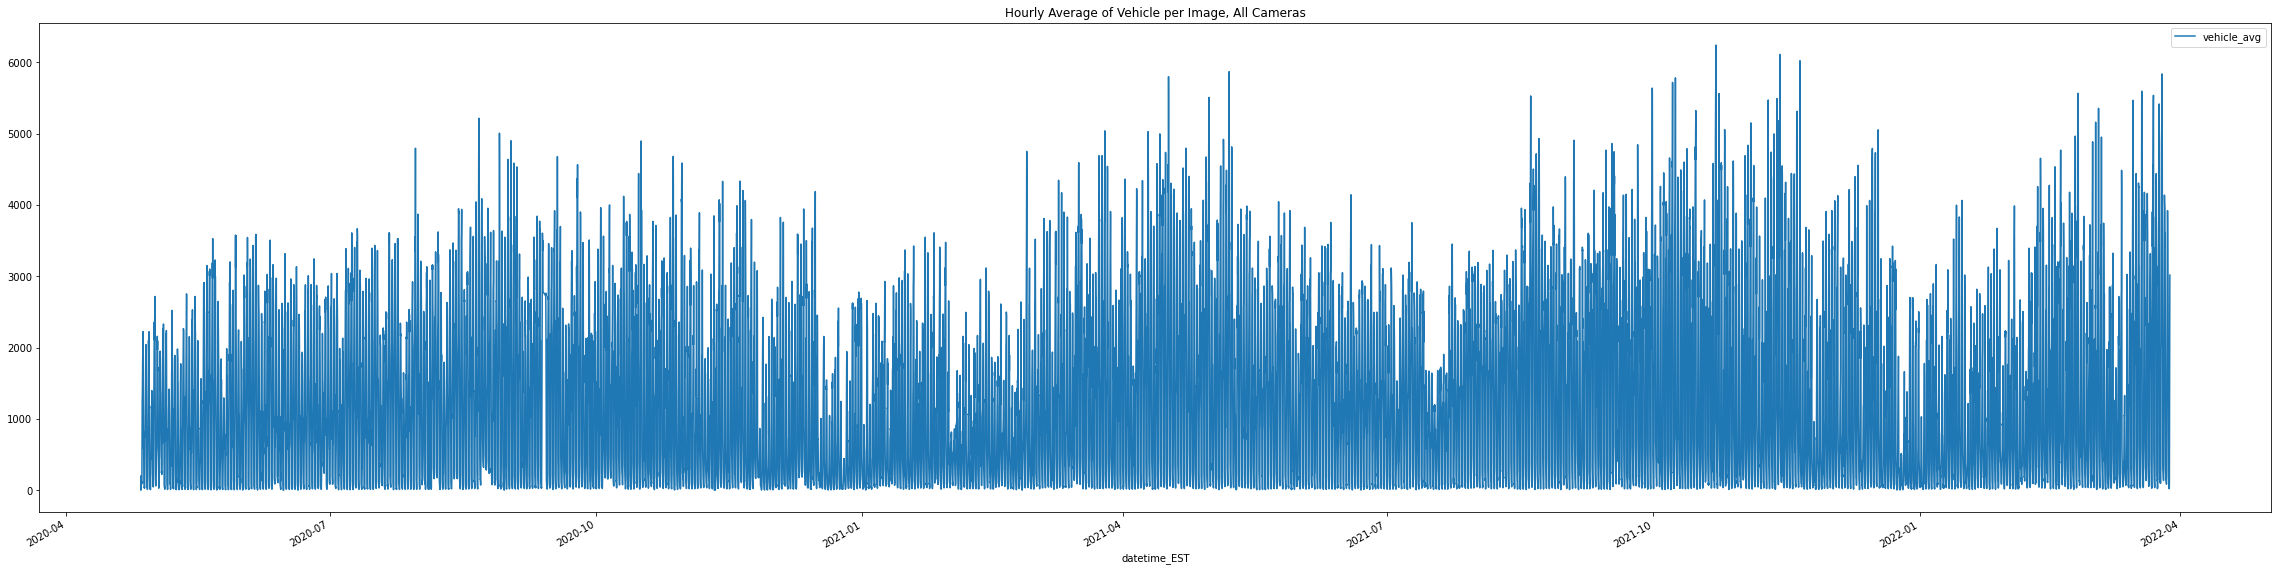

In [25]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicle per Image, All Cameras")

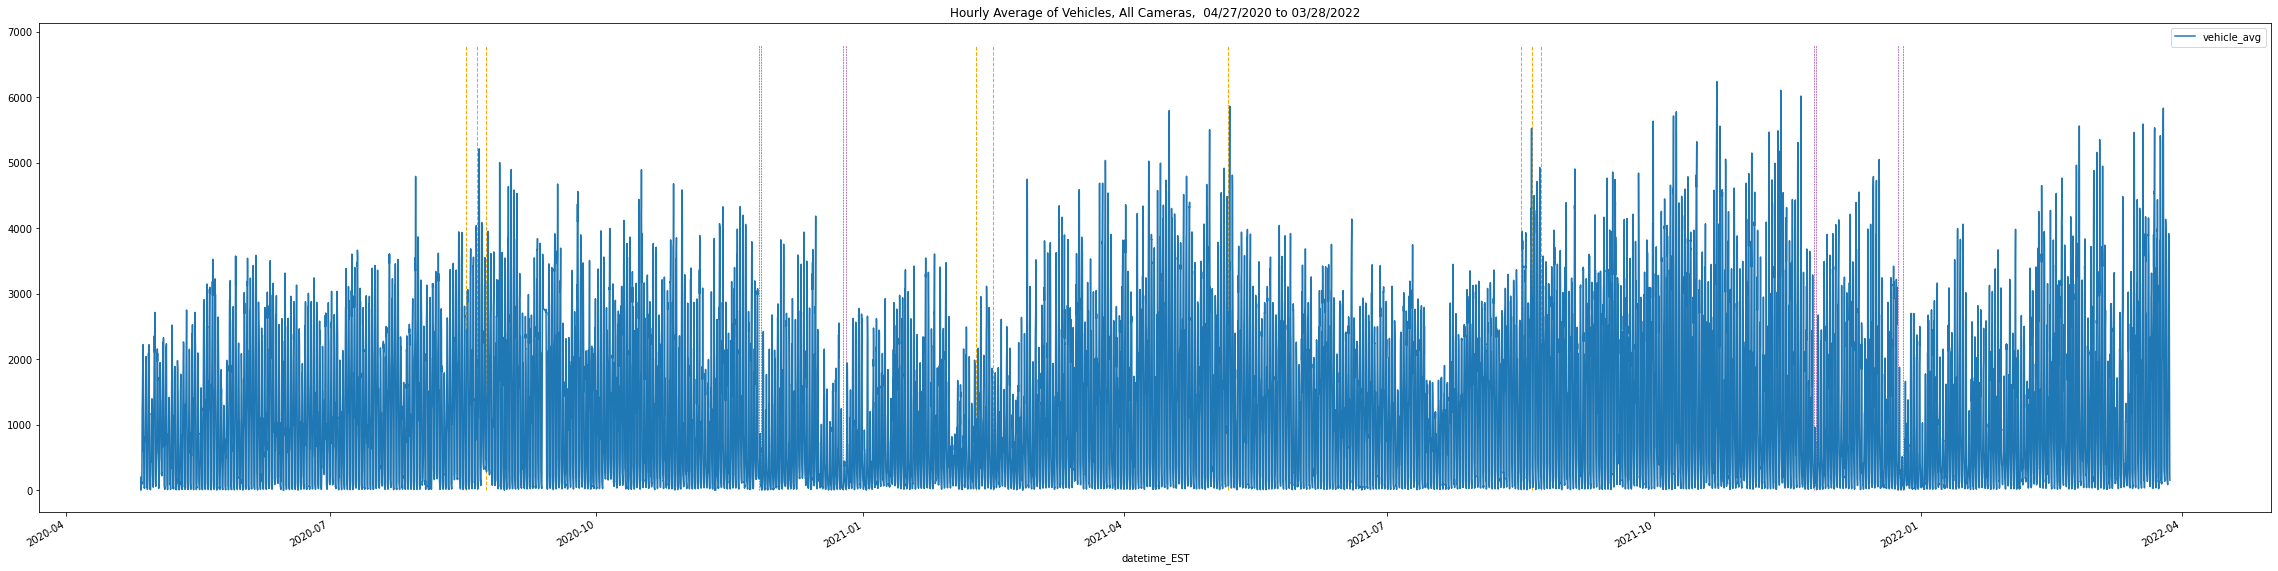

In [26]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-04-26 00:00:00') & (df_sampledh['datetime_EST'] < '2022-03-28 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  04/27/2020 to 03/28/2022")
y_min = 0
y_max = 6800

plt.vlines(x=['2020-11-26 00:00:00','2020-11-27 00:00:00','2020-12-25 00:00:00','2020-12-26 00:00:00','2021-11-25 00:00:00','2021-11-26 00:00:00','2021-12-24 00:00:00','2021-12-26 00:00:00'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-08-17 00:00:00','2020-08-21 00:00:00','2020-08-24 00:00:00','2021-02-09 00:00:00','2021-02-15 00:00:00','2021-05-07 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

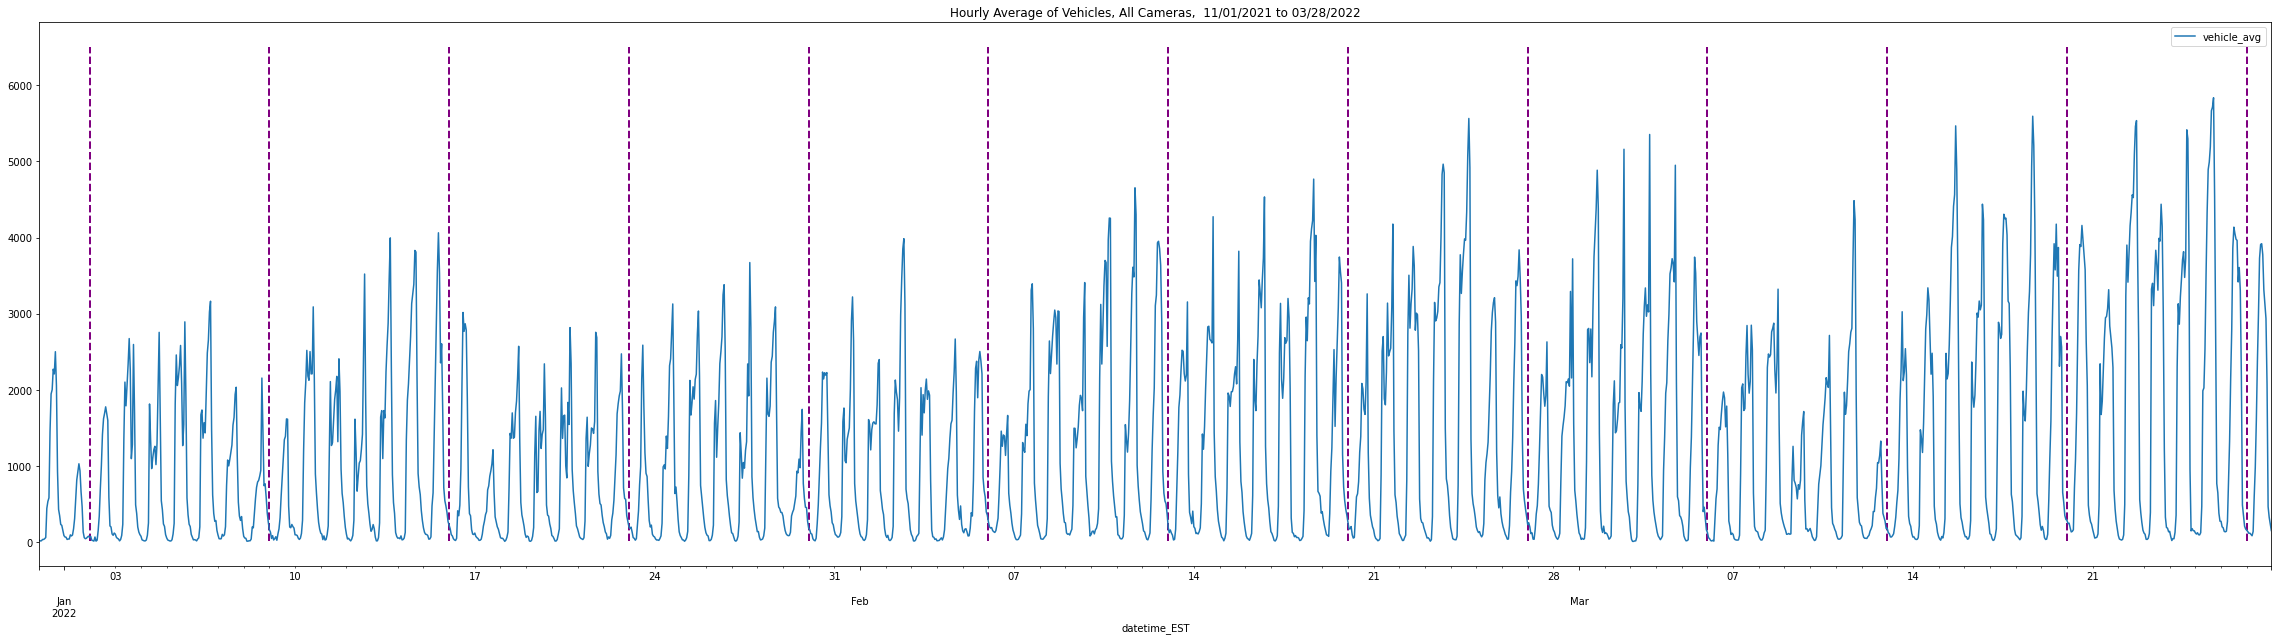

In [28]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2021-12-31 00:00:00') & (df_sampledh['datetime_EST'] < '2022-03-28 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  11/01/2021 to 03/28/2022")
y_min = sds.vehicle_count.min()
y_max = 6500

plt.vlines(x=['2022-01-02','2022-01-09','2022-01-16','2022-01-23','2022-01-30','2022-02-06','2022-02-13','2022-02-20','2022-02-27','2022-03-06','2022-03-13','2022-03-20','2022-03-27'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')


In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))